## Waste Management using CNN

In [1]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##

In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scatterplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [9]:
train_path="DATASET/TRAIN"
test_path="DATASET/TEST"

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
# Visualization
from cv2 import cvtColor
import cv2
import glob
import pandas as pd
from tqdm import tqdm


train_path = "DATASET/TRAIN"  

x_data = []
y_data = []


for category in glob.glob(train_path + '/*'):  
    for file in tqdm(glob.glob(category + '/*')): 
        img_array = cv2.imread(file)  
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  
        x_data.append(img_array) 
        y_data.append(category.split('/')[-1])  


data = pd.DataFrame({'image': x_data, 'label': y_data})




  4%|▎         | 454/12565 [00:06<02:58, 67.95it/s]

In [13]:
data.shape

(22564, 2)

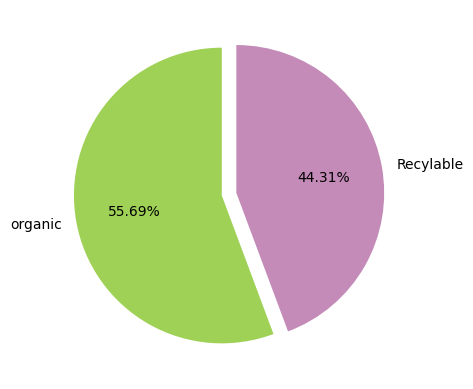

In [14]:
import matplotlib.pyplot as plt
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','Recylable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()

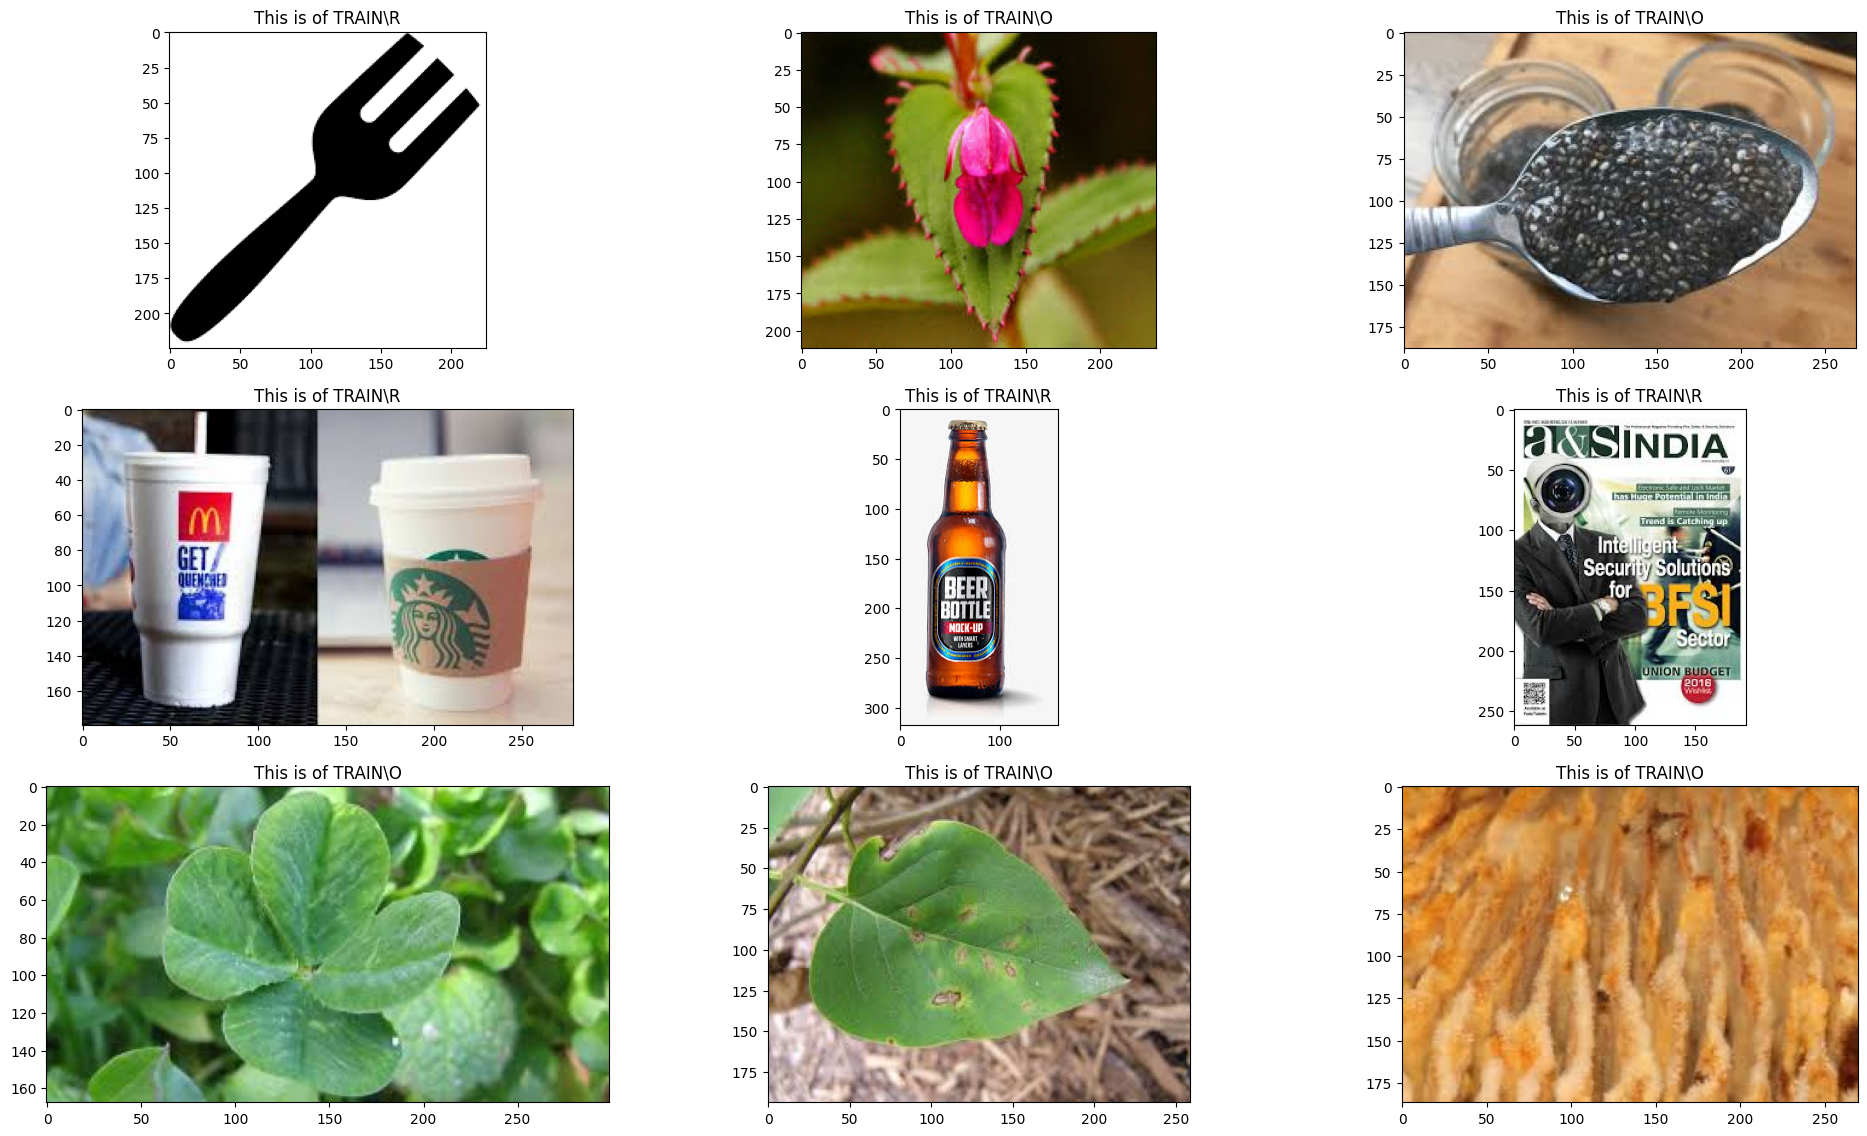

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    # Get the actual length of your data
    max_index = len(data.label)
    index = np.random.randint(max_index)
    plt.title(f'This is of {data.label.iloc[index]}')  # Using iloc for integer-based indexing
    plt.imshow(data.image[index])
plt.tight_layout()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3)))  # Fewer filters, reduced resolution
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(64))  # Fewer units
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


C:\Users\dhoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 828,610 (3.16 MB)

 Trainable params: 828,610 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
test_datagen = ImageDataGenerator(rescale=1./255)
test_path="DATASET/TEST"
batch_size = 16
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size = (128,128),
        batch_size = batch_size,
        color_mode ="rgb",
        class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size = (128,128),
        batch_size = batch_size,
        color_mode = "rgb",
        class_mode = "categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [5]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

C:\Users\dhoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 280s 196ms/step - accuracy: 0.7719 - loss: 0.5313 - val_accuracy: 0.8452 - val_loss: 0.3758
Epoch 2/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 88s 63ms/step - accuracy: 0.8284 - loss: 0.4237 - val_accuracy: 0.8870 - val_loss: 0.3042
Epoch 3/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 89s 63ms/step - accuracy: 0.8476 - loss: 0.3830 - val_accuracy: 0.8727 - val_loss: 0.3043
Epoch 4/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 85s 60ms/step - accuracy: 0.8532 - loss: 0.3734 - val_accuracy: 0.8969 - val_loss: 0.2893
Epoch 5/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.8626 - loss: 0.3478 - val_accuracy: 0.9184 - val_loss: 0.2481
Epoch 6/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.8786 - loss: 0.3105 - val_accuracy: 0.9236 - val_loss: 0.2282
Epoch 7/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 85s 60ms/step - accuracy: 0.8811 - loss: 0.3006 - val_accuracy: 0.9152 - val_loss: 0.2505
Epoch 8/10
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step - accuracy: 0.8862